<a href="https://colab.research.google.com/github/not-rdy/internship/blob/master/rec/clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import VALID_METRICS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('/content/drive/MyDrive/features/features.csv')

df1 = df.drop(['Unnamed: 0', 'smoking', 'name'], axis=1)
df1 = pd.get_dummies(df1, columns=['sex', 'classes', 'disability', 'preferential', 'job',
                            'city', 'marit_status', 'education', 'childs', 'networks'], drop_first = True)

In [3]:
# (Xi - min) / (max - min)
def norm1(array):
    return pd.Series( map( lambda x: (x - min(array))/(max(array) - min(array)), array ) )

# (Xi - mean) / std
def norm2(array):
    return pd.Series( map( lambda x: (x-array.mean())/array.std(), array ))

In [4]:
# стандартизируем (price, age, time)
df1_norm1 = df1.copy()
df1_norm2 = df1.copy()

for col in df1_norm1.columns[0:3]:
    df1_norm1[col] = norm1(df1_norm1[col])

for col in df1_norm2.columns[0:3]:
    df1_norm2[col] = norm2(df1_norm2[col])

### Трехмерное пространство, PCA

In [5]:
df = pd.read_csv('/content/drive/MyDrive/features/features.csv')

df1 = df.drop(['Unnamed: 0', 'smoking', 'name'], axis=1)
df1 = pd.get_dummies(df1, columns=['sex', 'classes', 'disability', 'preferential', 'job',
                            'city', 'marit_status', 'education', 'childs', 'networks'], drop_first = True)

# PCA df1_norm1
np.set_printoptions(suppress=True)
pca_3d = PCA(n_components=3)
df1_norm1_pca_3d = pca_3d.fit_transform(df1_norm1)
print('Объясненная дисперсия, pca_norm1_3d:', '\n', pca_3d.explained_variance_ratio_)
df1_norm1_pca_3d = pd.DataFrame(df1_norm1_pca_3d)

# PCA df1_norm2
np.set_printoptions(suppress=True)
pca_3d = PCA(n_components=3)
df1_norm2_pca_3d = pca_3d.fit_transform(df1_norm2)
print('Объясненная дисперсия, pca_norm2_3d:', '\n', pca_3d.explained_variance_ratio_)
df1_norm2_pca_3d = pd.DataFrame(df1_norm2_pca_3d)

Объясненная дисперсия, pca_norm1_3d: 
 [0.14122938 0.08928222 0.07719516]
Объясненная дисперсия, pca_norm2_3d: 
 [0.29437235 0.16628044 0.09125595]


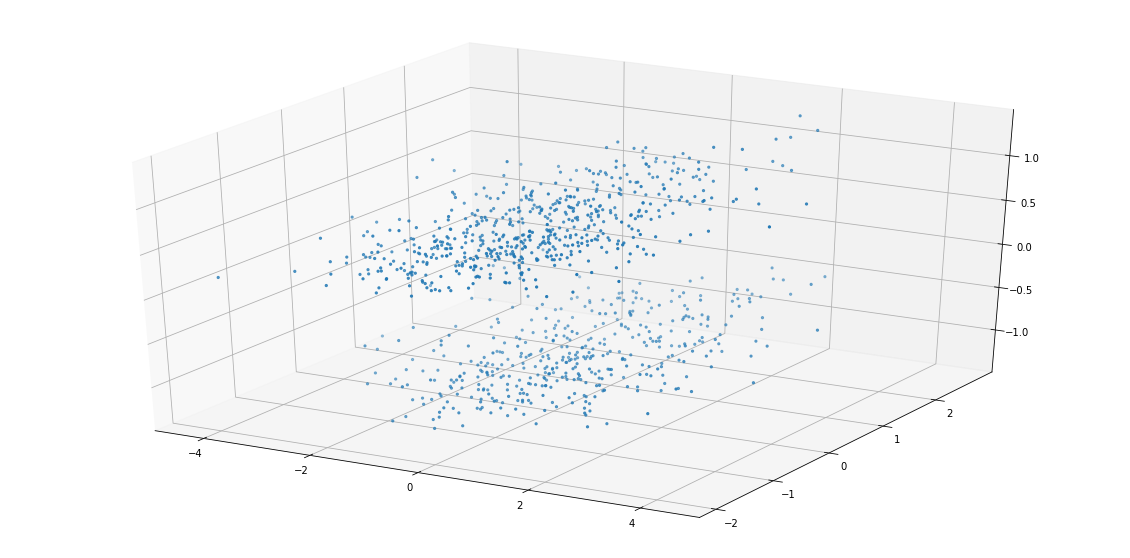

In [ ]:
# ужатое пространство признаков
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1_norm2_pca_3d.iloc[:, 0],
           df1_norm2_pca_3d.iloc[:, 1],
           df1_norm2_pca_3d.iloc[:, 2],
           s=5)

### Трехмерное пространство, t-SNE

In [ ]:
# генерим графики ужатого пространства

metric_list = VALID_METRICS['brute']
rate_list = [10, 30, 50, 100, 500, 1000]

params = { 'metric':metric_list, 'rate':rate_list }
params = ParameterGrid(params)
params = pd.DataFrame(params)

for i in range(len(params)):
    #
    print('iter: '+str(i))

    
    try:
        m = TSNE(n_components=3, 
                 learning_rate=params['rate'][i], 
                 metric=params['metric'][i], 
                 n_jobs=-1,
                 random_state=14)
        df1_norm1_tsne = m.fit_transform(df1_norm1)
        df1_norm2_tsne = m.fit_transform(df1_norm2)
        
        #norm1
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df1_norm1_tsne[:, 0],
                  df1_norm1_tsne[:, 2],
                  df1_norm1_tsne[:, 1],
                  s=10)
        label =['norm1, '
                +'metric: '+str(params['metric'][i]+', ')
                +'rate: '+str(params['rate'][i])+', ']
        plt.title(label=label)
        plt.close()
        plot_name = '/content/drive/MyDrive/features/basis/norm1_'+str(i)
        fig.savefig(plot_name)

        # norm2
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df1_norm2_tsne[:, 0],
                  df1_norm2_tsne[:, 2],
                  df1_norm2_tsne[:, 1],
                  s=10)
        label =['norm2, '
                +'metric: '+str(params['metric'][i]+', ')
                +'rate: '+str(params['rate'][i])+', ']
        plt.title(label=label)
        plt.close()
        plot_name = '/content/drive/MyDrive/features/basis/norm2_'+str(i)
        fig.savefig(plot_name)
    except Exception:
        print('norm2 : '+str(i))



Text(0.5, 0.92, 'norm2, metric: chebyshev, rate: 50')

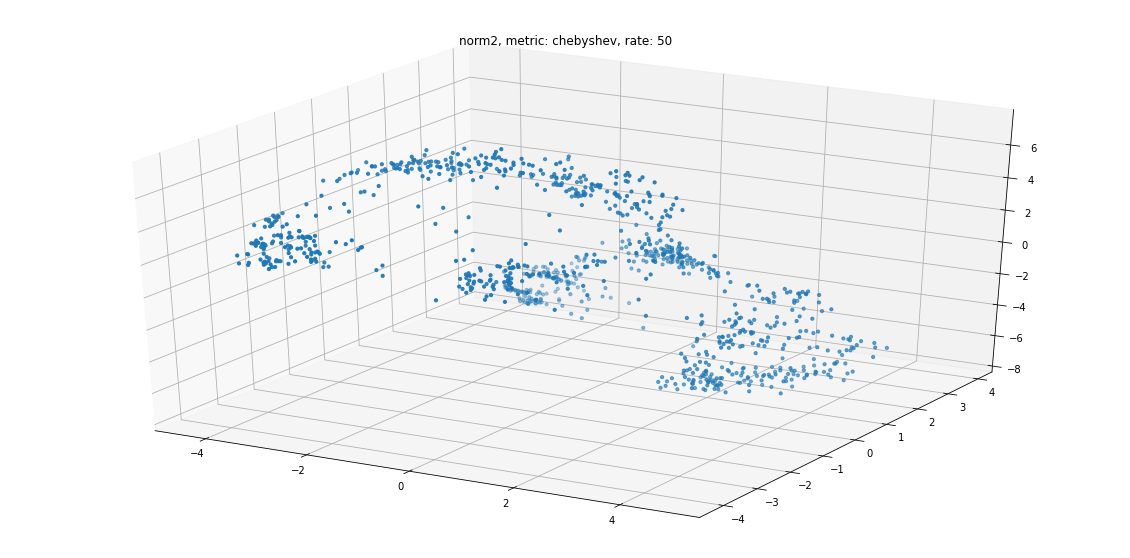

In [6]:
# ужатое пространство
metric = 'chebyshev'
learning_rate = 50

m = TSNE(n_components=3, 
         learning_rate=learning_rate, 
         metric=metric, 
         n_jobs=-1,
         random_state=14)
df1_norm2_tsne = m.fit_transform(df1_norm2)
df1_norm2_tsne = pd.DataFrame(df1_norm2_tsne)
        
#norm2
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1_norm2_tsne.iloc[:, 0],
           df1_norm2_tsne.iloc[:, 2],
           df1_norm2_tsne.iloc[:, 1],
           s=10)
label = 'norm2, '+'metric: '+str(metric+', ')+'rate: '+str(learning_rate)
plt.title(label=label)

# Иерархический кластерный анализ + PCA

In [ ]:
i=0
metric_list = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
params = { 'eps':np.linspace(1, 10, 100),
           'min_samples':range(5, 26),
           'metric':metric_list }
params = pd.DataFrame(ParameterGrid(params))
params['Silhouette'] = 0
params['n_clusters'] = 0

np.random.seed(14)
df_sample = df1_norm2.sample(frac=0.5).reset_index(drop=True)

for i in range(len(params)):
    print('iter: ', i)
    m = DBSCAN(eps=params['eps'][i], 
                min_samples=params['min_samples'][i], 
                metric=params['metric'][i],
                n_jobs=-1).fit(df_sample)
    try:
        params.loc[i, 'Silhouette'] = silhouette_score(df_sample, m.labels_)
        params.loc[i, 'n_clusters'] = len(np.unique(m.labels_))
    except: Exception

params.to_csv('/content/drive/MyDrive/features/dbscan_metric.csv', header=True)



In [ ]:
# метрика для каждой комбинации
params = { 'linkage_method':['single', 'complete', 'average', 'weighted', 
                             'centroid', 'median', 'ward'],
          'linkage_metric':['braycurtis', 'canberra', 'chebyshev', 'cityblock', 
                            'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 
                            'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 
                            'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 
                            'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'],
          'fcluster_t':[2, 3, 4, 5, 6],
          'fcluster_criterion':['maxclust'] }

params = pd.DataFrame(ParameterGrid(params))
params['Silhouette'] = 0
drop_index = params[ (params['linkage_method']=='ward') & (params['linkage_metric']!='euclidean') ].index
drop_index2 = params[ (params['linkage_method']=='centroid') & (params['linkage_metric']!='euclidean') ].index
drop_index3 = params[ (params['linkage_method']=='median') & (params['linkage_metric']!='euclidean') ].index
params = params.drop(drop_index)
params = params.drop(drop_index2)
params = params.drop(drop_index3).reset_index(drop=True)

np.random.seed(14)
df_sample = df1_norm2.sample(frac=0.5).reset_index(drop=True)

# кластеризация
for i in range(len(params)):
  
    #norm2  
    try:
        link2 = linkage(df_sample, method=params['linkage_method'][i], metric=params['linkage_metric'][i])
        labels = fcluster(link2, t=params['fcluster_t'][i], criterion=params['fcluster_criterion'][i])
    
        params.loc[i, 'Silhouette'] = silhouette_score(df_sample, labels)
    except Exception:
        print('norm2, ValueError: '+str(i))

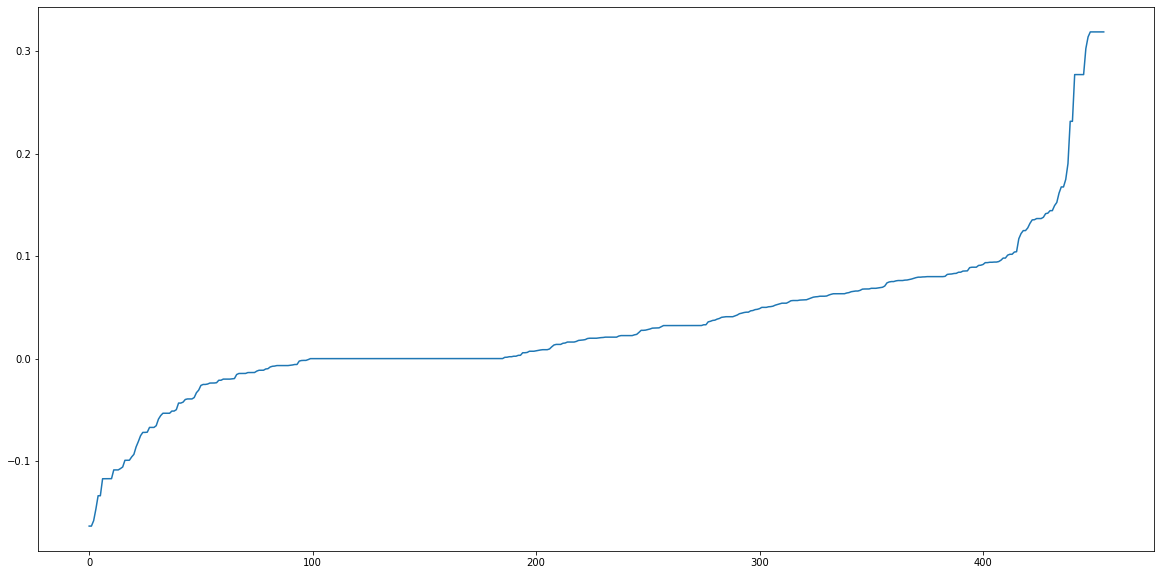

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(params.index, sorted(params['Silhouette']))

In [ ]:
params[ params['Silhouette'] >= 0.3 ]

,fcluster_criterion,fcluster_t,linkage_method,linkage_metric,Silhouette
2,maxclust,2,single,chebyshev,0.318706
46,maxclust,2,average,chebyshev,0.318706
64,maxclust,2,average,sqeuclidean,0.318706
88,maxclust,2,centroid,euclidean,0.313835
89,maxclust,2,median,euclidean,0.302420
93,maxclust,3,single,chebyshev,0.318706
184,maxclust,4,single,chebyshev,0.318706
275,maxclust,5,single,chebyshev,0.318706
366,maxclust,6,single,chebyshev,0.318706


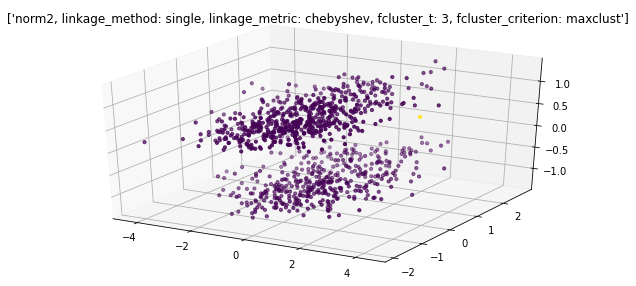

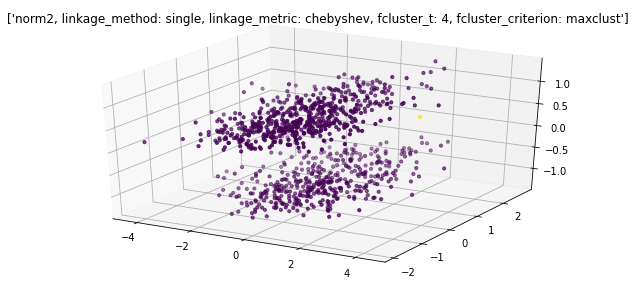

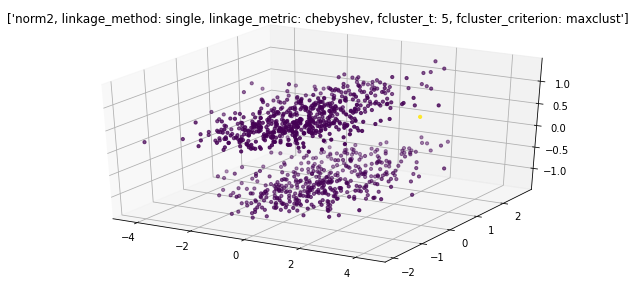

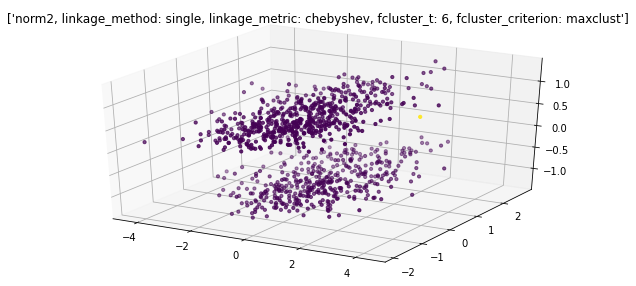

In [ ]:
idx = params[ (params['Silhouette'] >= 0.3) & (params['fcluster_t'] > 2) ].index

for i in idx:
    method=params['linkage_method'][i] 
    metric=params['linkage_metric'][i]
    t=params['fcluster_t'][i] 
    criterion=params['fcluster_criterion'][i]

    link2 = linkage(df1_norm2, method=method, metric=metric)
    df1_norm2_pca_3d['cluster'] = fcluster(link2, t=t, criterion=criterion)

    n_claster = len(np.unique(df1_norm2_pca_3d['cluster']))

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df1_norm2_pca_3d.iloc[:, 0],
               df1_norm2_pca_3d.iloc[:, 1],
               df1_norm2_pca_3d.iloc[:, 2],
               s=10,
               c=df1_norm2_pca_3d['cluster'])
    label =['norm2, '
        +'linkage_method: '+method+', '
        +'linkage_metric: '+metric+', '
        +'fcluster_t: '+str(t)+', '
        +'fcluster_criterion: '+criterion]
    plt.title(label=label)


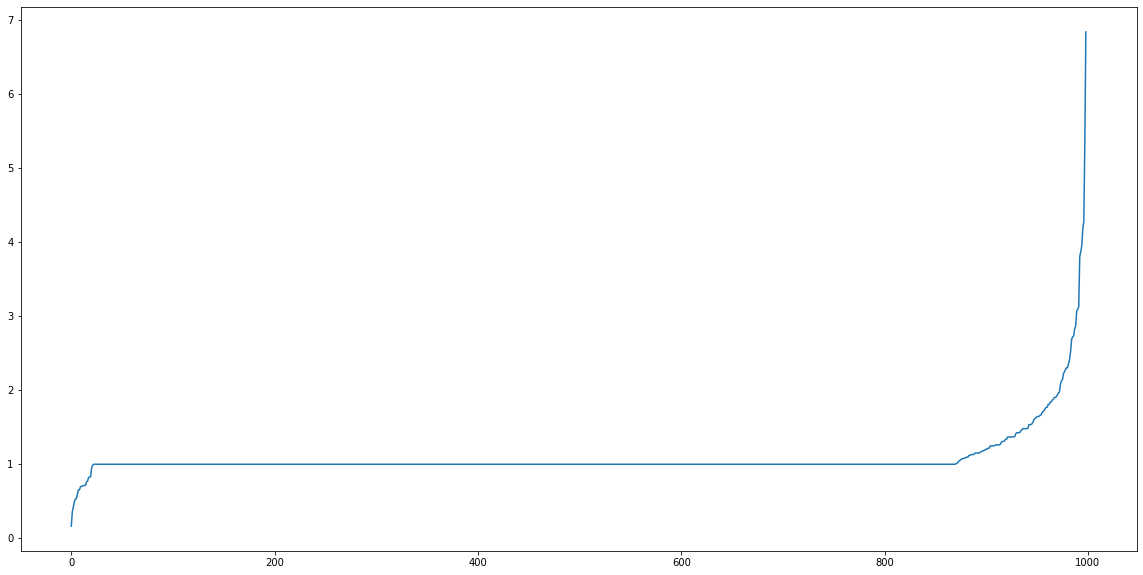

In [ ]:
#***
method = 'complete'
metric = 'chebyshev'

criterion = 'distance'
link2 = linkage(df1_norm2, method=method, metric=metric)

plt.figure(figsize=(20, 10))
plt.plot(link2[:, 2])

Text(0.5, 0.92, "['norm2, linkage_method: complete, linkage_metric: chebyshev, fcluster_t: 3, fcluster_criterion: distance, Silhouette: 0.2228054246708555']")

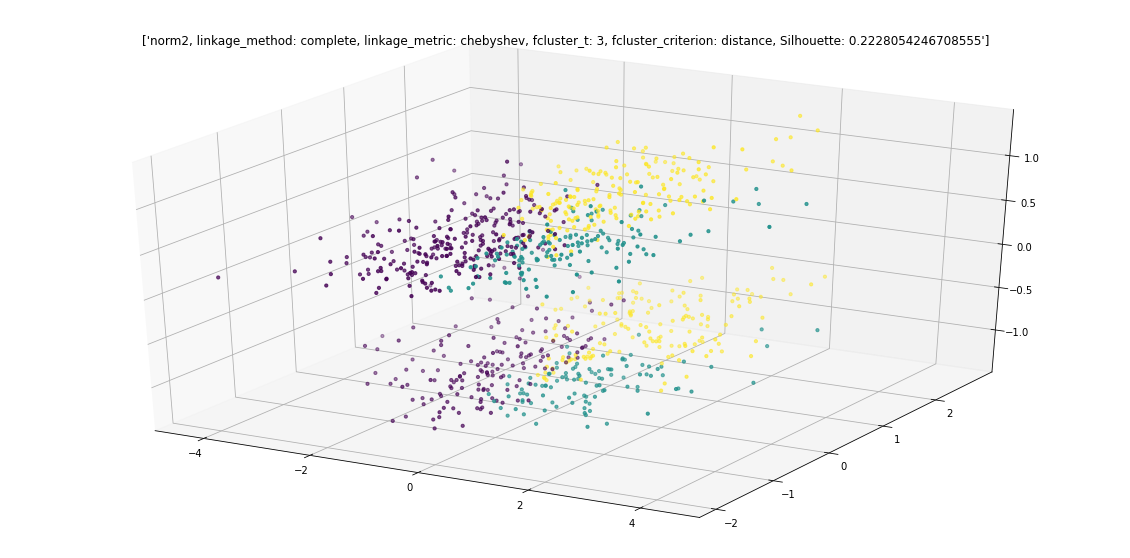

In [ ]:
#***
method = 'complete'
metric = 'chebyshev'


t = 4.5
criterion = 'distance'
link2 = linkage(df1_norm2, method=method, metric=metric)
df1_norm2_pca_3d['cluster'] = fcluster(link2, t=t, criterion=criterion)

n_claster = len(np.unique(df1_norm2_pca_3d['cluster']))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1_norm2_pca_3d.iloc[:, 0],
           df1_norm2_pca_3d.iloc[:, 1],
           df1_norm2_pca_3d.iloc[:, 2],
           s=10,
           c=df1_norm2_pca_3d['cluster'])

Silhouette = str(silhouette_score(df1_norm2_pca_3d.iloc[:, 0:3], df1_norm2_pca_3d['cluster']))
label =['norm2, '
    +'linkage_method: '+str(method+', ')
    +'linkage_metric: '+str(metric+', ')
    +'fcluster_t: '+str(n_claster)+', '
    +'fcluster_criterion: '+str(criterion)+', '
    +'Silhouette: '+Silhouette]
plt.title(label=label)

# Иерархический кластерный анализ + t-SNE

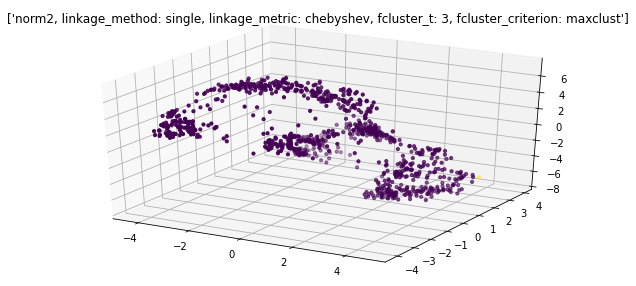

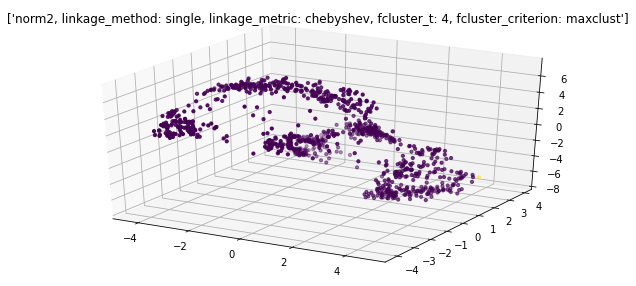

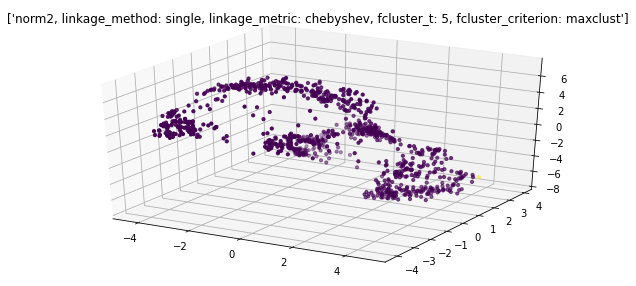

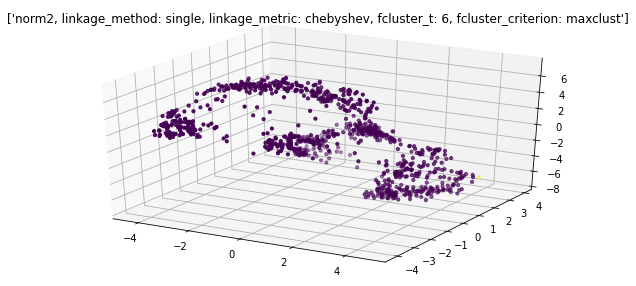

In [ ]:
idx = params[ (params['Silhouette'] >= 0.3) & (params['fcluster_t'] > 2) ].index

for i in idx:
    method=params['linkage_method'][i] 
    metric=params['linkage_metric'][i]
    t=params['fcluster_t'][i] 
    criterion=params['fcluster_criterion'][i]

    link2 = linkage(df1_norm2, method=method, metric=metric)
    df1_norm2_tsne['cluster'] = fcluster(link2, t=t, criterion=criterion)

    n_claster = len(np.unique(df1_norm2_pca_3d['cluster']))

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df1_norm2_tsne.iloc[:, 0],
               df1_norm2_tsne.iloc[:, 2],
               df1_norm2_tsne.iloc[:, 1],
               s=10,
               c=df1_norm2_tsne['cluster'])
    Silhouette = str(silhouette_score(df1_norm2_tsne.iloc[:, 0:3], df1_norm2_tsne['cluster']))
    label =['norm2, '
        +'linkage_method: '+method+', '
        +'linkage_metric: '+metric+', '
        +'fcluster_t: '+str(t)+', '
        +'fcluster_criterion: '+criterion]
    plt.title(label=label)


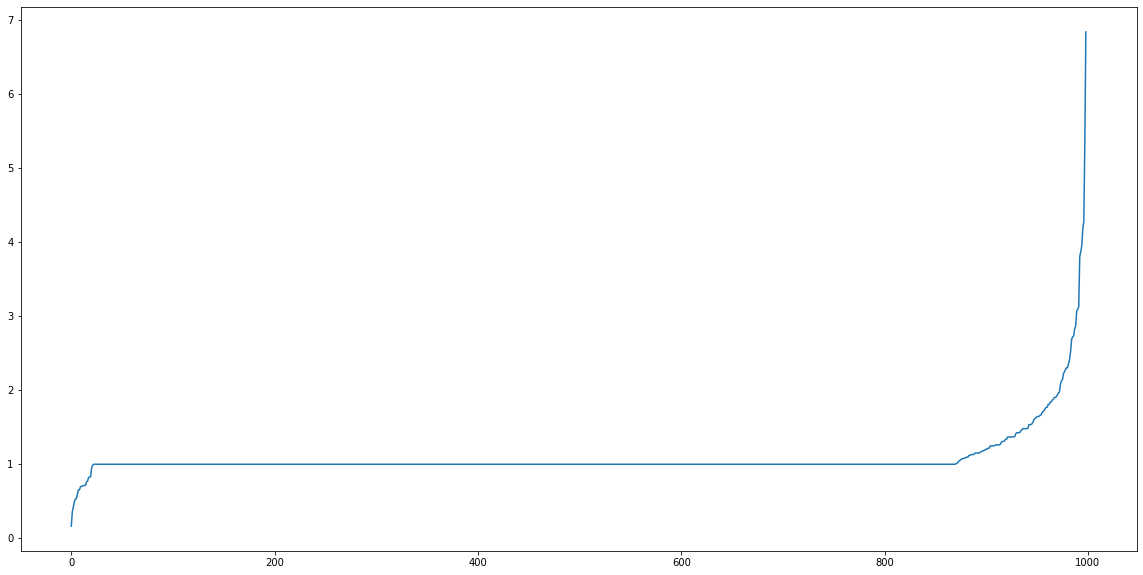

In [ ]:
#***
method = 'complete'
metric = 'chebyshev'

link2 = linkage(df1_norm2, method=method, metric=metric)

plt.figure(figsize=(20, 10))
plt.plot(link2[:, 2])

Text(0.5, 0.92, "['norm2, linkage_method: complete, linkage_metric: chebyshev, fcluster_t: 3, fcluster_criterion: distance, Silhouette: 0.24720019']")

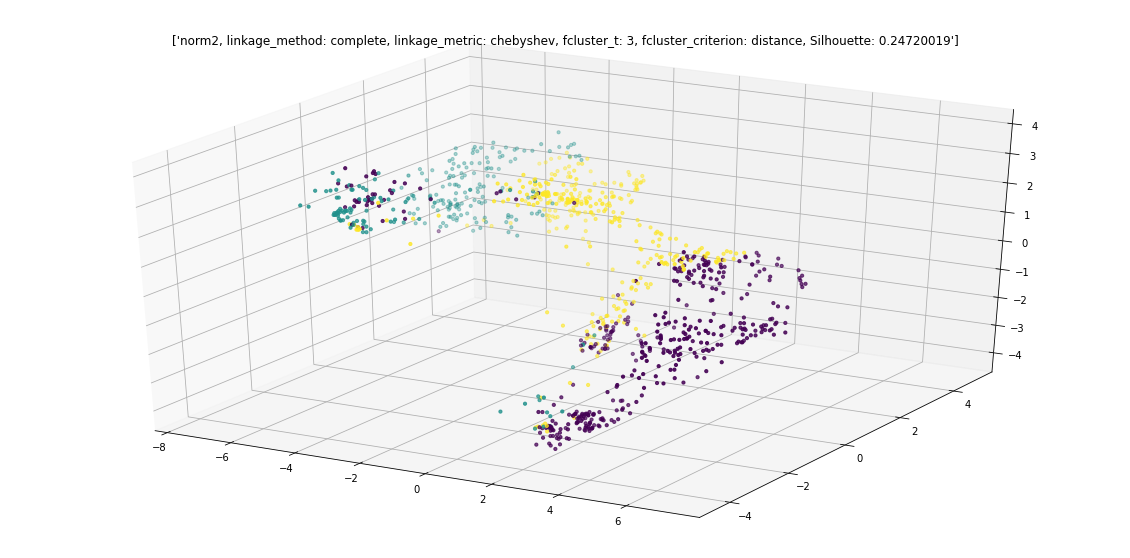

In [ ]:
#***
t = 4.5
criterion = 'distance'
df1_norm2_tsne = pd.DataFrame(df1_norm2_tsne)
df1_norm2_tsne['cluster'] = fcluster(link2, t=t, criterion=criterion)

n_claster = len(np.unique(df1_norm2_tsne['cluster']))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1_norm2_tsne.iloc[:, 1],
           df1_norm2_tsne.iloc[:, 0],
           df1_norm2_tsne.iloc[:, 2],
           s=10,
           c=df1_norm2_tsne['cluster'])
Silhouette = str(silhouette_score(df1_norm2_tsne.iloc[:, 0:3], df1_norm2_tsne['cluster']))

label = ['norm2, '
          +'linkage_method: '+str(method+', ')
          +'linkage_metric: '+str(metric+', ')
          +'fcluster_t: '+str(n_claster)+', '
          +'fcluster_criterion: '+str(criterion)+', '
          +'Silhouette: '+Silhouette]

plt.title(label=label)


# kMeans + PCA

In [ ]:
# метрика для разных комбинаций параметров
params = { 'n_clust':range(2, 11), 'Silhouette':[0] }
params = pd.DataFrame(ParameterGrid(params))

np.random.seed(14)
df_sample = df1_norm2.sample(frac=0.5).reset_index(drop=True)
for i in range(len(params)):
    m = KMeans(n_clusters=params['n_clust'][i],
               random_state=14,
               n_jobs=-1,
               max_iter=10000,
               n_init=100)
    m.fit(df_sample)
    params.loc[i, 'Silhouette'] = silhouette_score(df_sample, m.labels_)

In [ ]:
params

,Silhouette,n_clust
0,0.161457,2
1,0.129254,3
2,0.107116,4
3,0.105225,5
4,0.102036,6
5,0.101416,7
6,0.095342,8
7,0.090447,9
8,0.093366,10


Text(0.5, 0.92, 'silhouette: 0.27037362411997007')

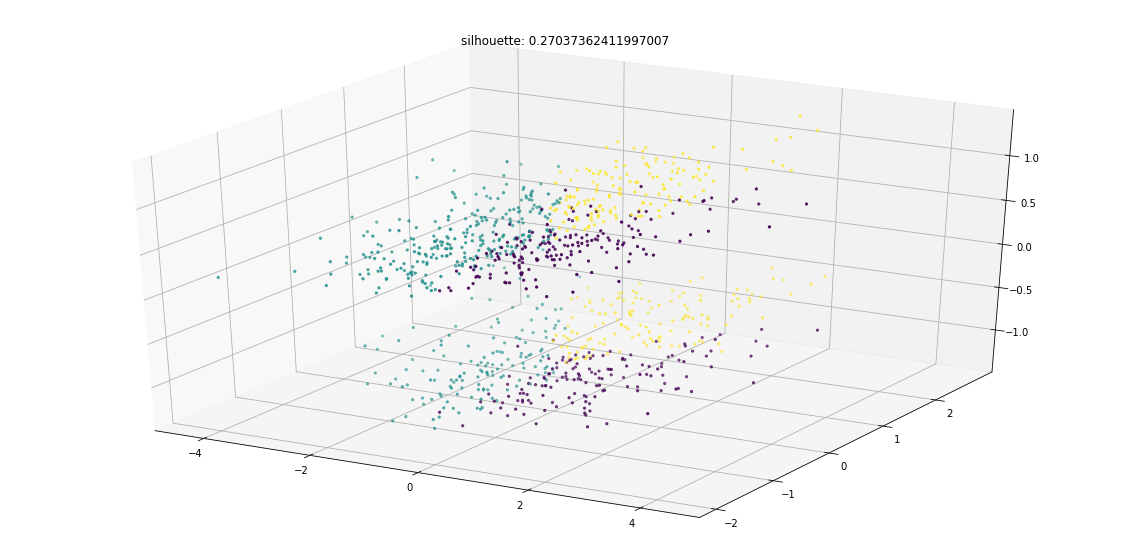

In [ ]:
n=3

m = KMeans(n_clusters=n, random_state=14,
           n_jobs =-1, max_iter=10000, n_init=100)
m.fit(df1_norm2)

df1_norm2_pca_3d['cluster'] = m.labels_
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1_norm2_pca_3d.iloc[:, 0],
           df1_norm2_pca_3d.iloc[:, 1],
           df1_norm2_pca_3d.iloc[:, 2],
           s=5,
           c=df1_norm2_pca_3d['cluster'])
label = 'silhouette: ' + str(silhouette_score(df1_norm2_pca_3d.iloc[:, 0:3], m.labels_))
plt.title(label)

# kMeans + t-SNE

Text(0.5, 0.92, 'silhouette: 0.29828182')

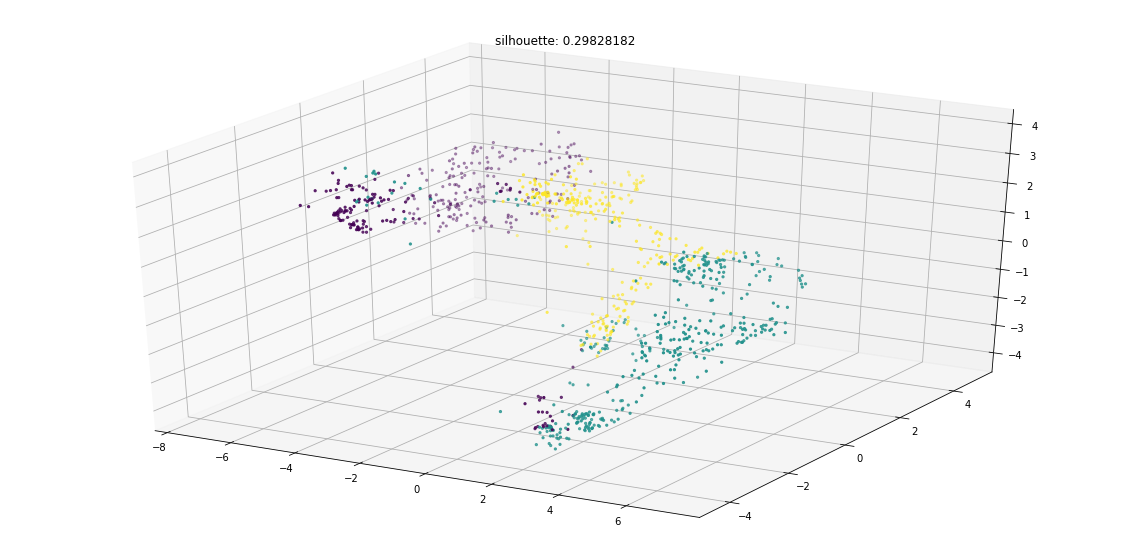

In [7]:
# метки на t-SNE пространстве
n=3

m = KMeans(n_clusters=n, random_state=14,
           n_jobs =-1, max_iter=10000, n_init=100)
m.fit(df1_norm2)

df1_norm2_tsne['cluster'] = m.labels_
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1_norm2_tsne.iloc[:, 1],
           df1_norm2_tsne.iloc[:, 0],
           df1_norm2_tsne.iloc[:, 2],
           s=5,
           c=df1_norm2_tsne['cluster'])
label = 'silhouette: ' + str(silhouette_score(df1_norm2_tsne.iloc[:, 0:3], m.labels_))
plt.title(label)


# DBSCAN + PCA

In [ ]:
# метрика для каждой комбинации параметров
i=0
metric_list = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
params = { 'eps':np.linspace(1, 10, 100),
           'min_samples':range(5, 26),
           'metric':metric_list }
params = pd.DataFrame(ParameterGrid(params))
params['Silhouette'] = 0
params['n_clusters'] = 0

np.random.seed(14)
df_sample = df1_norm2.sample(frac=0.5).reset_index(drop=True)

for i in range(len(params)):
    print('iter: ', i)
    m = DBSCAN(eps=params['eps'][i], 
                min_samples=params['min_samples'][i], 
                metric=params['metric'][i],
                n_jobs=-1).fit(df_sample)
    try:
        params.loc[i, 'Silhouette'] = silhouette_score(df_sample, m.labels_)
        params.loc[i, 'n_clusters'] = len(np.unique(m.labels_))
    except: Exception

params.to_csv('/content/drive/MyDrive/features/dbscan_metric.csv', header=True)



In [ ]:
dbscan_metric = pd.read_csv('/content/drive/MyDrive/features/dbscan_metric.csv')
dbscan_metric = dbscan_metric.drop('Unnamed: 0', axis=1)

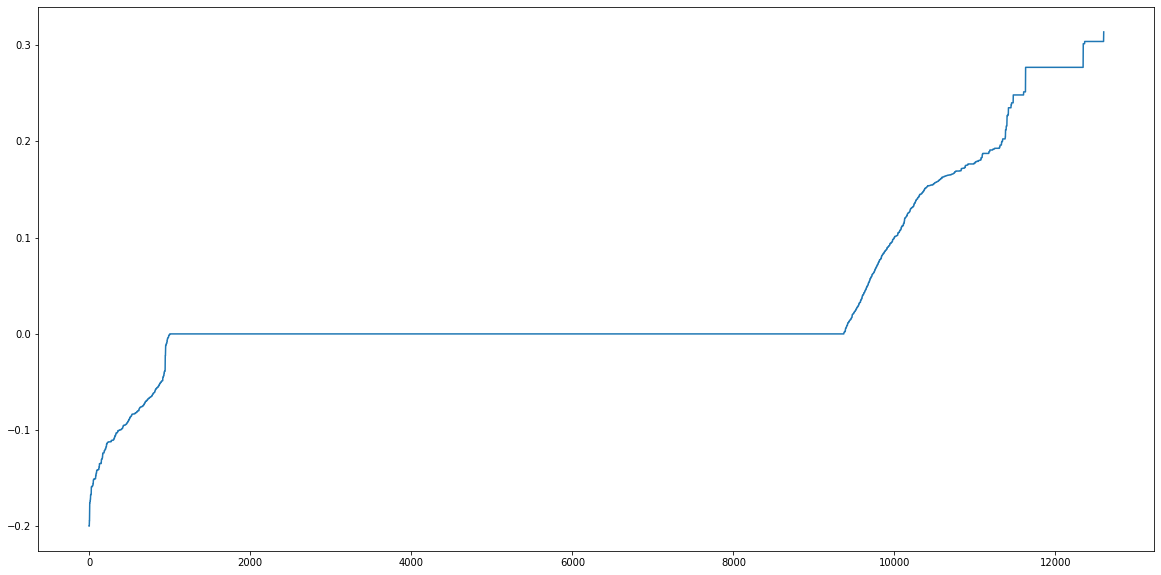

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dbscan_metric.index, sorted(dbscan_metric['Silhouette']))

In [ ]:
dbscan_metric[ (dbscan_metric['Silhouette'] >= 0.3) & (dbscan_metric['n_clusters'] > 2) ]

,eps,metric,min_samples,Silhouette,n_clusters


In [ ]:
dbscan_metric[ (dbscan_metric['Silhouette'] > 0.02) & (dbscan_metric['n_clusters'] > 2) ]

,eps,metric,min_samples,Silhouette,n_clusters
4914,4.545455,cityblock,5,0.020963,3
4977,4.545455,l1,5,0.020963,3
5019,4.545455,manhattan,5,0.020963,3
5041,4.636364,cityblock,6,0.020713,3
5104,4.636364,l1,6,0.020713,3
5146,4.636364,manhattan,6,0.020713,3


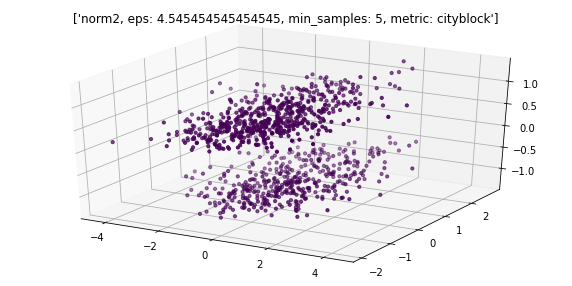

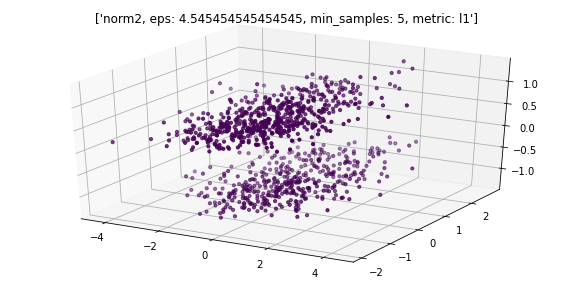

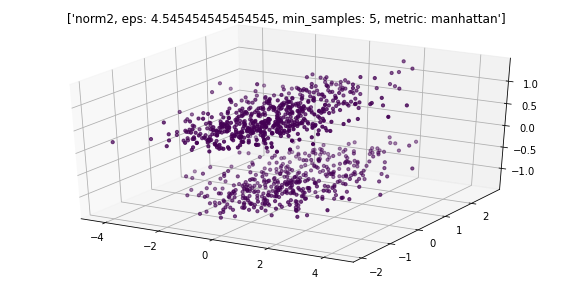

In [ ]:
idx = dbscan_metric[ (dbscan_metric['Silhouette'] > 0.02) & (dbscan_metric['n_clusters'] > 2) ].index[0:3]

for i in idx:
    eps=dbscan_metric.loc[i, 'eps']
    min_samples=dbscan_metric.loc[i, 'min_samples']
    metric=dbscan_metric.loc[i, 'metric']

    m = DBSCAN(eps=eps, 
                min_samples=min_samples, 
                metric=metric,
                n_jobs=-1).fit(df1_norm2_pca_3d)
    
    n_claster = len(np.unique(m.labels_))
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df1_norm2_pca_3d.iloc[:, 0],
               df1_norm2_pca_3d.iloc[:, 1],
               df1_norm2_pca_3d.iloc[:, 2],
               s=10,
               c=m.labels_)
    label =['norm2, '
        +'eps: '+str(eps)+', '
        +'min_samples: '+str(min_samples)+', '
        +'metric: '+str(metric)]
    plt.title(label=label)
    

# DBSCAN + t-SNE

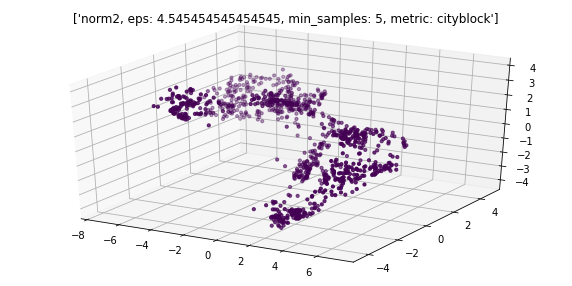

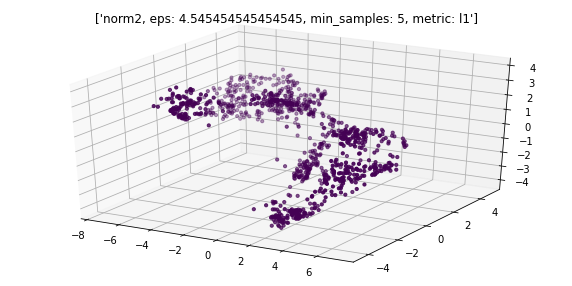

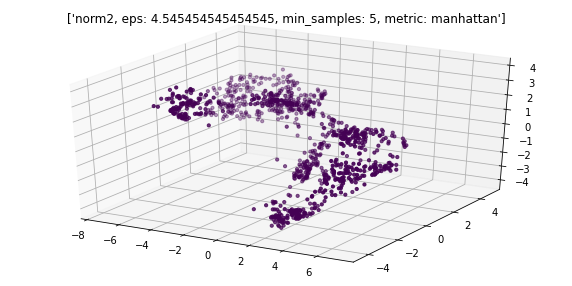

In [ ]:
idx = dbscan_metric[ (dbscan_metric['Silhouette'] > 0.02) & (dbscan_metric['n_clusters'] > 2) ].index[0:3]

for i in idx:
    eps=dbscan_metric.loc[i, 'eps']
    min_samples=dbscan_metric.loc[i, 'min_samples']
    metric=dbscan_metric.loc[i, 'metric']

    m = DBSCAN(eps=eps, 
                min_samples=min_samples, 
                metric=metric,
                n_jobs=-1).fit(df1_norm2_tsne)
    
    n_claster = len(np.unique(m.labels_))
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df1_norm2_tsne.iloc[:, 1],
               df1_norm2_tsne.iloc[:, 0],
               df1_norm2_tsne.iloc[:, 2],
               s=10,
               c=m.labels_)
    label =['norm2, '
        +'eps: '+str(eps)+', '
        +'min_samples: '+str(min_samples)+', '
        +'metric: '+str(metric)]
    plt.title(label=label)
    

# Интерпретация

In [335]:
# 316
# 402
# 282

df1_group=pd.read_csv('/content/drive/MyDrive/features/df1_group.csv')
df1_group = df1_group.set_index('clust')


for a in range(0, 3):
    for i in range(3, len(df1_group.columns)):
        if a == 0:
            df1_group.iloc[a, i] = df1_group.iloc[a, i]/316
        if a == 1:
            df1_group.iloc[a, i] = df1_group.iloc[a, i]/402
        if a == 2:
            df1_group.iloc[a, i] = df1_group.iloc[a, i]/282


df1_group

,age,price,time,sex_Ж,sex_М,sex_nan,classes_СВ,classes_купе,classes_люкс,classes_плацкарт,classes_nan,disability_Да,disability_Нет,disability_nan,preferential_Да,preferential_Нет,preferential_nan,job_Водители и операторы подвижного оборудования,job_Неквалифицированные работники по сбору мусора и другие неквалифицированные работники,"job_Неквалифицированные рабочие сельского и лесного хозяйства, рыбоводства и рыболовства","job_Неквалифицированные рабочие, занятые в горнодобывающей промышленности, строительстве, обрабатывающей промышленности и на транспорте",job_Операторы промышленных установок и стационарногооборудования,job_Продавцы,"job_Работники служб, осуществляющих охрану граждан и собственности",job_Работники сферы индивидуальных услуг,"job_Работники, оказывающие услуги по индивидуальному уходу",job_Рабочие в области электротехники и электроники,"job_Рабочие пищевой, деревообрабатывающей, текстильной и швейной промышленности и рабочие родственных занятий","job_Рабочие, занятые в металлообрабатывающем и машиностроительном производстве, механики и ремонтники","job_Рабочие, занятые в строительстве, и рабочие родственных занятий (за исключением электриков)",job_Служащие в сфере обработки числовой информации и учета материальных ценностей,job_Служащие общего профиляи обслуживающие офисную технику,job_Специалисты в области здравоохранения,job_Специалисты в области науки и техники,job_Специалисты в области образования,"job_Специалисты в области права, гуманитарных областей и культуры",job_Специалисты в сфере бизнеса и администрирования,job_Специалисты по информационно-коммуникационным технологиям (ИКТ),job_Специалисты-техники в области информационно-коммуникационных технологий (ИКТ),job_Специалисты-техники в области науки и техники,job_Средний медицинский персонал здравоохранения,"job_Средний специальный персонал в области правовой, социальной работы, культуры, обучения, спорта и родственных занятий",job_Средний специальный персонал по экономической и административной деятельности,job_Уборщики и прислуга,job_nan,city_г. Абакан,city_г. Альметьевск,city_г. Ангарск,city_г. Арзамас,city_г. Армавир,city_г. Артем,city_г. Архангельск,city_г. Астрахань,city_г. Ачинск,city_г. Балаково,city_г. Балашиха,city_г. Барнаул,city_г. Батайск,city_г. Белгород,city_г. Березники,city_г. Бийск,city_г. Благовещенск,city_г. Братск,city_г. Брянск,city_г. Великий Новгород,city_г. Владивосток,city_г. Владикавказ,city_г. Владимир,city_г. Волгоград,city_г. Волгодонск,city_г. Волжский,city_г. Вологда,city_г. Воронеж,city_г. Грозный,city_г. Дербент,city_г. Дзержинск,city_г. Долгопрудный,city_г. Домодедово,city_г. Евпатория,city_г. Екатеринбург,city_г. Елец,city_г. Ессентуки,city_г. Железногорск,city_г. Зеленодольск,city_г. Златоуст,city_г. Иваново,city_г. Ижевск,city_г. Иркутск,city_г. Йошкар-Ола,city_г. Казань,city_г. Калининград,city_г. Калуга,city_г. Каменск - Уральский,city_г. Каспийск,city_г. Кемерово,city_г. Керчь,city_г. Киров,city_г. Кисловодск,city_г. Ковров,city_г. Коломна,city_г. Комсомольск-на-Амуре,city_г. Копейск,city_г. Королёв,city_г. Кострома,city_г. Красногорск,city_г. Краснодар,city_г. Красноярск,city_г. Курган,city_г. Курск,city_г. Липецк,city_г. Люберцы,city_г. Магнитогорск,city_г. Майкоп,city_г. Махачкала,city_г. Москва,city_г. Мурманск,city_г. Муром,city_г. Мытищи,city_г. Наб. Челны,city_г. Назрань,city_г. Нальчик,city_г. Находка,city_г. Невинномысск,city_г. Нефтеюганск,city_г. Нижневартовск,city_г. Нижний Новгород,city_г. Нижний Тагил,city_г. Новокузнецк,city_г. Новокуйбышевск,city_г. Новомосковск,city_г. Новороссийск,city_г. Новосибирск,city_г. Новочебоксарск,city_г. Новочеркасск,city_г. Новый Уренгой,city_г. Ногинск,city_г. Норильск,city_г. Ноябрьск,city_г. Обнинск,city_г. Одинцово,city_г. Октябрьский,city_г. Омск,city_г. Оренбург,city_г. Орехово-Зуево,city_г. Орск,city_г. Орёл,city_г. Пенза,city_г. Первоуральск,city_г. Пермь,city_г. Петрозаводск,city_г. Петропавловск-Камчатский,city_г. Подольск,city_г. Прокопьевск,city_г. Псков,city

In [ ]:
#@title
fig, ax = plt.subplots(figsize=(20,13))
r = 3
c = 3
# ВОЗРАСТ
my_dict = {'clust0':df1['age'][df1['clust']==0], 
           'clust1':df1['age'][df1['clust']==1], 
           'clust2':df1['age'][df1['clust']==2]}

width = 0.7
green_diamond = dict(markerfacecolor='g', marker='D')

ax = plt.subplot(r, c, 1)
ax.boxplot(my_dict.values(), widths=width, flierprops=green_diamond)
ax.set_ylabel('age')
ax.set_xticklabels(my_dict.keys())
ax.set_title('Возраст')
fig.tight_layout()

# ЦЕНА БИЛЕТА
my_dict = {'clust0':df1['price'][df1['clust']==0], 
           'clust1':df1['price'][df1['clust']==1], 
           'clust2':df1['price'][df1['clust']==2]}

width = 0.7
green_diamond = dict(markerfacecolor='g', marker='D')

ax = plt.subplot(r, c, 2)
ax.boxplot(my_dict.values(), widths=width, flierprops=green_diamond)
ax.set_ylabel('price')
ax.set_xticklabels(my_dict.keys())
ax.set_title('Стоимость билета')
fig.tight_layout()

# ВРЕМЯ В ПУТИ
my_dict = {'clust0':df1['time'][df1['clust']==0], 
           'clust1':df1['time'][df1['clust']==1], 
           'clust2':df1['time'][df1['clust']==2]}

width = 0.7
green_diamond = dict(markerfacecolor='g', marker='D')

ax = plt.subplot(r, c, 3)
ax.boxplot(my_dict.values(), widths=width, flierprops=green_diamond)
ax.set_ylabel('time')
ax.set_xticklabels(my_dict.keys())
ax.set_title('Время в пути')
fig.tight_layout()

# РАСПРЕДЕЛЕНИЕ МУЖЧИН И ЖЕНЩИН ПО КЛАСТЕРАМ
labels = ['clust0', 'clust1', 'clust2']
women = [df1_group.loc[0, 'sex_Ж'],
         df1_group.loc[1, 'sex_Ж'],
         df1_group.loc[2, 'sex_Ж']]
men = [df1_group.loc[0, 'sex_М'],
       df1_group.loc[1, 'sex_М'],
       df1_group.loc[2, 'sex_М']]

x = np.arange(len(labels))
width = 0.35


ax = plt.subplot(r, c, 4)
ax.bar(x - width/2, women, width, label='women')
ax.bar(x + width/2, men, width, label='men')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Распределение мужчин и женщин по кластерам')
ax.set_ylim(0, 1)
plt.legend()
fig.tight_layout()

# РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ
labels = ['clust0', 'clust1', 'clust2']
sv = [df1_group.iloc[0, 6],
      df1_group.iloc[1, 6],
      df1_group.iloc[2, 6]]

cupe = [df1_group.iloc[0, 7],
        df1_group.iloc[1, 7],
        df1_group.iloc[2, 7]]

luxe = [df1_group.iloc[0, 8],
        df1_group.iloc[1, 8],
        df1_group.iloc[2, 8]]

plackart = [df1_group.iloc[0, 9],
            df1_group.iloc[1, 9],
            df1_group.iloc[2, 9]] 
        
x = np.arange(len(labels))
width = 0.2


ax = plt.subplot(r, c, 5)
ax.bar(x - width*1.5, sv, width, label='СВ')
ax.bar(x - width/2, cupe, width, label='купe')
ax.bar(x + width/2, luxe, width, label='люкс')
ax.bar(x + width*1.5, plackart, width, label='плацкарт')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Класс обслуживания')
ax.set_ylim(0, 1)
plt.legend()
fig.tight_layout()

# ИНВАЛИДНОСТЬ
labels = ['clust0', 'clust1', 'clust2']
yes = [df1_group.iloc[0, 11],
       df1_group.iloc[1, 11],
       df1_group.iloc[2, 11]]

no = [df1_group.iloc[0, 12],
      df1_group.iloc[1, 12],
      df1_group.iloc[2, 12]]

x = np.arange(len(labels))
width = 0.35


ax = plt.subplot(r, c, 6)
ax.bar(x - width/2, yes, width, label='Да')
ax.bar(x + width/2, no, width, label='Нет')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Наличие инвалидности')
ax.set_ylim(0, 1)
plt.legend()
fig.tight_layout()

# ЛЬГОТНАЯ КАТЕГОРИЯ
labels = ['clust0', 'clust1', 'clust2']
yes = [df1_group.iloc[0, 14],
       df1_group.iloc[1, 14],
       df1_group.iloc[2, 14]]

no = [df1_group.iloc[0, 15],
      df1_group.iloc[1, 15],
      df1_group.iloc[2, 15]]

x = np.arange(len(labels))
width = 0.35


ax = plt.subplot(r, c, 7)
ax.bar(x - width/2, yes, width, label='Да')
ax.bar(x + width/2, no, width, label='Нет')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Льготная категория')
ax.set_ylim(0, 1)
plt.legend()
fig.tight_layout()

In [ ]:
#@title
fig2, ax = plt.subplots(figsize=(20,5))
r = 1
c = 3
# ПРОФЕССИЯ
labels = ['clust0', 'clust1', 'clust2']

top = [df1_group.T.iloc[17:44, 0].sort_values(ascending=False)[0],
       df1_group.T.iloc[17:44, 0].sort_values(ascending=False)[1],
       df1_group.T.iloc[17:44, 0].sort_values(ascending=False)[2],
       df1_group.T.iloc[17:44, 0].sort_values(ascending=False)[3],
       df1_group.T.iloc[17:44, 1].sort_values(ascending=False)[0],
       df1_group.T.iloc[17:44, 1].sort_values(ascending=False)[1],
       df1_group.T.iloc[17:44, 1].sort_values(ascending=False)[2],
       df1_group.T.iloc[17:44, 1].sort_values(ascending=False)[3],
       df1_group.T.iloc[17:44, 2].sort_values(ascending=False)[0],
       df1_group.T.iloc[17:44, 2].sort_values(ascending=False)[1],
       df1_group.T.iloc[17:44, 2].sort_values(ascending=False)[2],
       df1_group.T.iloc[17:44, 2].sort_values(ascending=False)[3]]

x = np.arange(12)
width = 1

ax = plt.subplot(r, c, 1)
ax.bar(x, top, width, color=['g','g','g','g', 
                             'b','b','b','b',
                             'y','y','y','y'], edgecolor='black')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(jobs, rotation=90)
ax.set_title('Распределение профессий')
ax.set_ylim(0, 0.05)
plt.legend()
fig.tight_layout()

# ГОРОД
labels = ['clust0', 'clust1', 'clust2']

top = [df1_group.T.iloc[46:207, 0].sort_values(ascending=False)[0], #Мск
       df1_group.T.iloc[46:207, 0].sort_values(ascending=False)[1], #Спб
       df1_group.T.iloc[46:207, 0].sort_values(ascending=False)[2], #Екб
       df1_group.T.iloc[46:207, 0].sort_values(ascending=False)[3], #Краснодар
       df1_group.T.iloc[46:207, 1].sort_values(ascending=False)[0], #Мск
       df1_group.T.iloc[46:207, 1].sort_values(ascending=False)[1], #Спб
       df1_group.T.iloc[46:207, 1].sort_values(ascending=False)[2], #Екб
       df1_group.T.iloc[46:207, 1].sort_values(ascending=False)[3], #Тюмень
       df1_group.T.iloc[46:207, 2].sort_values(ascending=False)[0], #Мск
       df1_group.T.iloc[46:207, 2].sort_values(ascending=False)[1], #Спб
       df1_group.T.iloc[46:207, 2].sort_values(ascending=False)[2], #Воронеж
       df1_group.T.iloc[46:207, 2].sort_values(ascending=False)[3]] #Самара

city = ['Мск', 'Спб', 'Екб', 'Краснодар', 
        'Мск', 'Спб', 'Екб', 'Тюмень',
        'Мск', 'Спб', 'Воронеж', 'Самара']

x = np.arange(12)
width = 1

ax = plt.subplot(r, c, 2)
ax.bar(x, top, width, color=['g','g','g','g', 
                             'b','b','b','b',
                             'y','y','y','y'], edgecolor='black')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(city, rotation=90)
ax.set_title('Распределение по городам')
ax.set_ylim(0, 0.2)
plt.legend()
fig.tight_layout()

# СЕМЕЙНОЕ ПОЛОЖЕНИЕ
status = [df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[0],
          df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[1],
          df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[2],
          df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[3],
          df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[4],
          df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[5],
          df1_group.T.iloc[207:214, 0].sort_values(ascending=False)[6],
          
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[0],
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[1],
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[2],
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[3],
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[4],
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[5],
          df1_group.T.iloc[207:214, 1].sort_values(ascending=False)[6],
          
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[0],
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[1],
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[2],
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[3],
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[4],
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[5],
          df1_group.T.iloc[207:214, 2].sort_values(ascending=False)[6]]

labels = ['в браке', 'не состояла в браке',
       'не состоял в браке', 'разведена',
       'разведен', 'вдовец', 'вдова',
       'в браке', 'не состояла в браке',
       'не состоял в браке', 'разведена',
       'разведен', 'вдовец', 'вдова',
       'в браке', 'вдова', 'разведена',
       'не состояла в браке', 'вдовец',
       'разведен', 'не состоял в браке']

x = np.arange(21)
width = 1

ax = plt.subplot(r, c, 3)
ax.bar(x, status, width, color=['g','g','g','g','g','g','g', 
                                'b','b','b','b','b','b','b',
                                'y','y','y','y','y','y','y'], edgecolor='black')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Семейное положение')
ax.set_ylim(0, 0.25)
plt.legend()
fig.tight_layout()

In [ ]:
#@title
fig3, ax = plt.subplots(figsize=(20,5))
r = 1
c = 3
# ОБРАЗОВАНИЕ
top = [df1_group.T.iloc[215:219, 0].sort_values(ascending=False)[0],
       df1_group.T.iloc[215:219, 0].sort_values(ascending=False)[1],
       df1_group.T.iloc[215:219, 0].sort_values(ascending=False)[2],
       df1_group.T.iloc[215:219, 0].sort_values(ascending=False)[3],
       df1_group.T.iloc[215:219, 1].sort_values(ascending=False)[0],
       df1_group.T.iloc[215:219, 1].sort_values(ascending=False)[1],
       df1_group.T.iloc[215:219, 1].sort_values(ascending=False)[2],
       df1_group.T.iloc[215:219, 1].sort_values(ascending=False)[3],
       df1_group.T.iloc[215:219, 2].sort_values(ascending=False)[0],
       df1_group.T.iloc[215:219, 2].sort_values(ascending=False)[1],
       df1_group.T.iloc[215:219, 2].sort_values(ascending=False)[2],
       df1_group.T.iloc[215:219, 2].sort_values(ascending=False)[3]]

labels = ['среднее профессиональное', 'высшее',
       'среднее общее', 'неполное высшее',
       'среднее профессиональное', 'высшее',
       'среднее общее', 'неполное высшее',
       'среднее профессиональное', 'высшее',
       'среднее общее', 'неполное высшее']

x = np.arange(12)
width = 1

ax = plt.subplot(r, c, 1)
ax.bar(x, top, width, color=['g','g','g','g', 
                             'b','b','b','b',
                             'y','y','y','y'], edgecolor='black')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Образование')
ax.set_ylim(0, 0.21)
plt.legend()
fig.tight_layout()

# ДЕТИ
top = [df1_group.T.iloc[220:226, 0].sort_values(ascending=False)[0],
       df1_group.T.iloc[220:226, 0].sort_values(ascending=False)[1],
       df1_group.T.iloc[220:226, 0].sort_values(ascending=False)[2],
       df1_group.T.iloc[220:226, 0].sort_values(ascending=False)[3],
       df1_group.T.iloc[220:226, 0].sort_values(ascending=False)[4],
       df1_group.T.iloc[220:226, 0].sort_values(ascending=False)[5],

       df1_group.T.iloc[220:226, 1].sort_values(ascending=False)[0],
       df1_group.T.iloc[220:226, 1].sort_values(ascending=False)[1],
       df1_group.T.iloc[220:226, 1].sort_values(ascending=False)[2],
       df1_group.T.iloc[220:226, 1].sort_values(ascending=False)[3],
       df1_group.T.iloc[220:226, 1].sort_values(ascending=False)[4],
       df1_group.T.iloc[220:226, 1].sort_values(ascending=False)[5],

       df1_group.T.iloc[220:226, 2].sort_values(ascending=False)[0],
       df1_group.T.iloc[220:226, 2].sort_values(ascending=False)[1],
       df1_group.T.iloc[220:226, 2].sort_values(ascending=False)[2],
       df1_group.T.iloc[220:226, 2].sort_values(ascending=False)[3],
       df1_group.T.iloc[220:226, 2].sort_values(ascending=False)[4],
       df1_group.T.iloc[220:226, 2].sort_values(ascending=False)[5]]

labels = ['Нет', '1', '2', '4', '3', '5',
          'Нет', '1', '2', '3', '5', '4',
          'Нет', '1', '2', '5', '3', '4']

x = np.arange(18)
width = 1

ax = plt.subplot(r, c, 2)
ax.bar(x, top, width, color=['g','g','g','g','g','g', 
                             'b','b','b','b','b','b',
                             'y','y','y','y','y','y'], edgecolor='black')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Дети')
ax.set_ylim(0, 0.4)
plt.legend()
fig.tight_layout()

# СОЦ.СЕТИ
top = [df1_group.T.iloc[227:233, 0].sort_values(ascending=False)[0],
       df1_group.T.iloc[227:233, 0].sort_values(ascending=False)[1],
       df1_group.T.iloc[227:233, 0].sort_values(ascending=False)[2],
       df1_group.T.iloc[227:233, 0].sort_values(ascending=False)[3],
       df1_group.T.iloc[227:233, 0].sort_values(ascending=False)[4],
       df1_group.T.iloc[227:233, 0].sort_values(ascending=False)[5],

       df1_group.T.iloc[227:233, 1].sort_values(ascending=False)[0],
       df1_group.T.iloc[227:233, 1].sort_values(ascending=False)[1],
       df1_group.T.iloc[227:233, 1].sort_values(ascending=False)[2],
       df1_group.T.iloc[227:233, 1].sort_values(ascending=False)[3],
       df1_group.T.iloc[227:233, 1].sort_values(ascending=False)[4],
       df1_group.T.iloc[227:233, 1].sort_values(ascending=False)[5],

       df1_group.T.iloc[227:233, 2].sort_values(ascending=False)[0],
       df1_group.T.iloc[227:233, 2].sort_values(ascending=False)[1],
       df1_group.T.iloc[227:233, 2].sort_values(ascending=False)[2],
       df1_group.T.iloc[227:233, 2].sort_values(ascending=False)[3],
       df1_group.T.iloc[227:233, 2].sort_values(ascending=False)[4],
       df1_group.T.iloc[227:233, 2].sort_values(ascending=False)[5]]

labels = ['Нет', 'facebook', 'vk',
       'instagram', 'одноклассники', 'tiktok',
       'Нет', 'facebook', 'vk',
       'instagram', 'одноклассники', 'tiktok',
       'Нет', 'одноклассники', 'facebook',
       'instagram', 'vk', 'tiktok']

x = np.arange(18)
width = 1

ax = plt.subplot(r, c, 3)
ax.bar(x, top, width, color=['g','g','g','g','g','g', 
                             'b','b','b','b','b','b',
                             'y','y','y','y','y','y'], edgecolor='black')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Наличие социальных сетей')
ax.set_ylim(0, 0.6)
plt.legend()
fig.tight_layout()

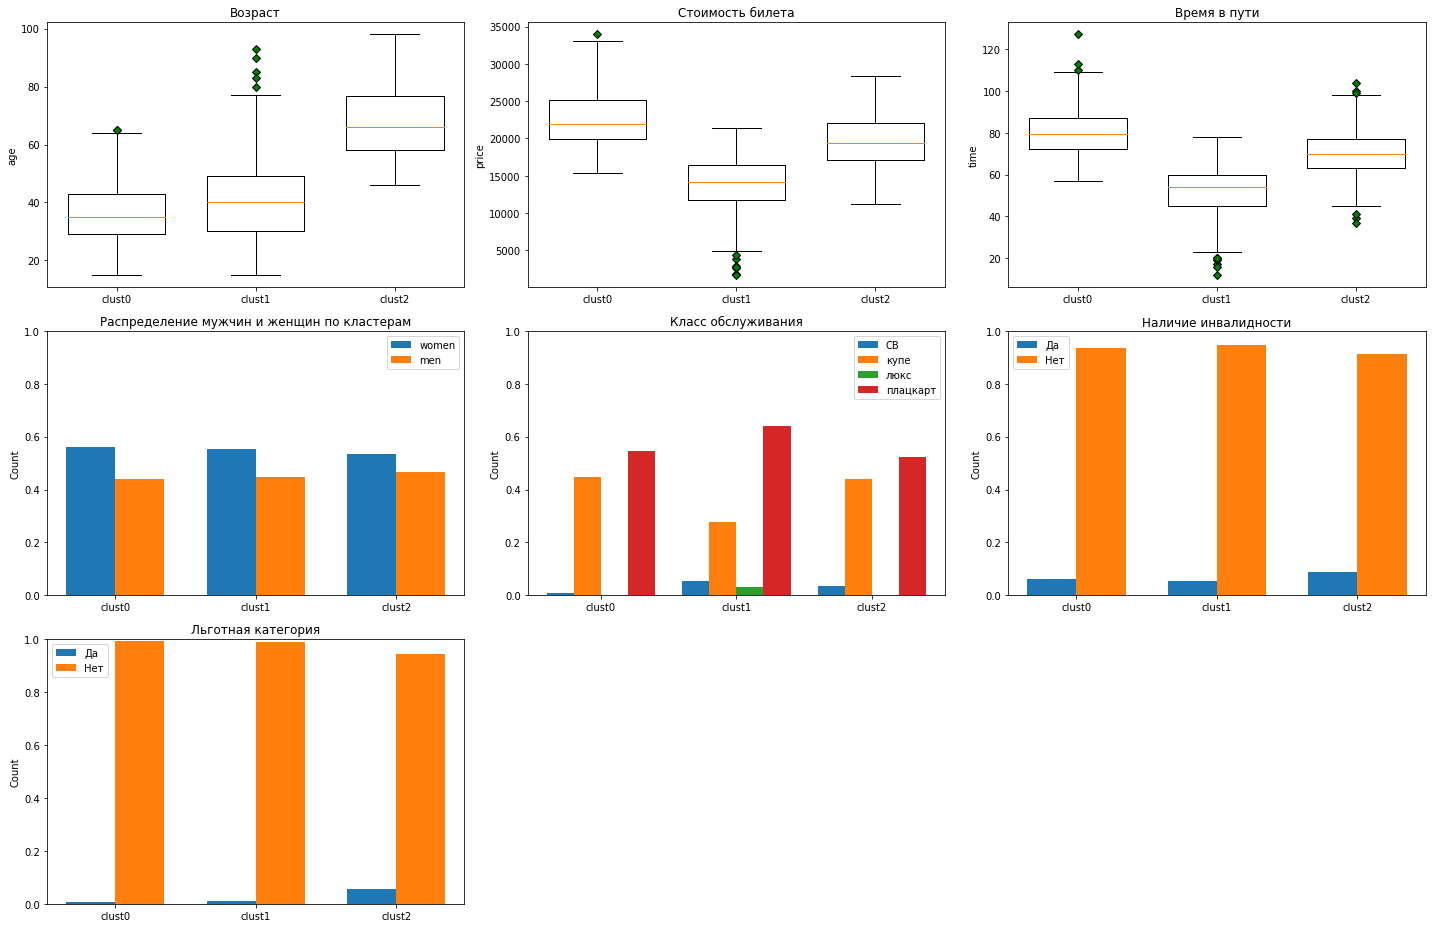

In [355]:
fig

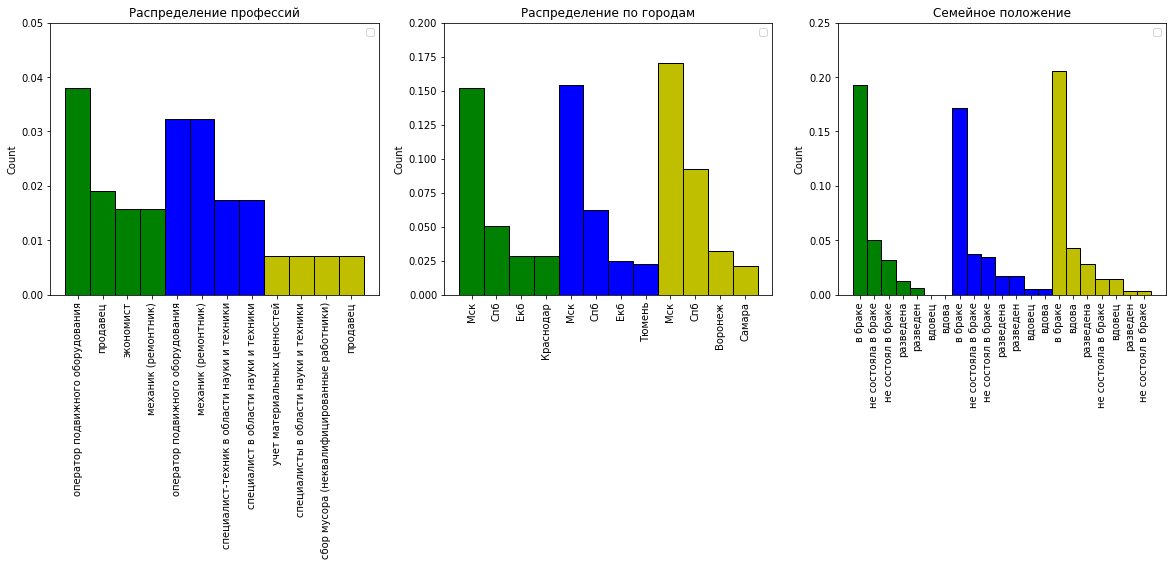

In [356]:
fig2

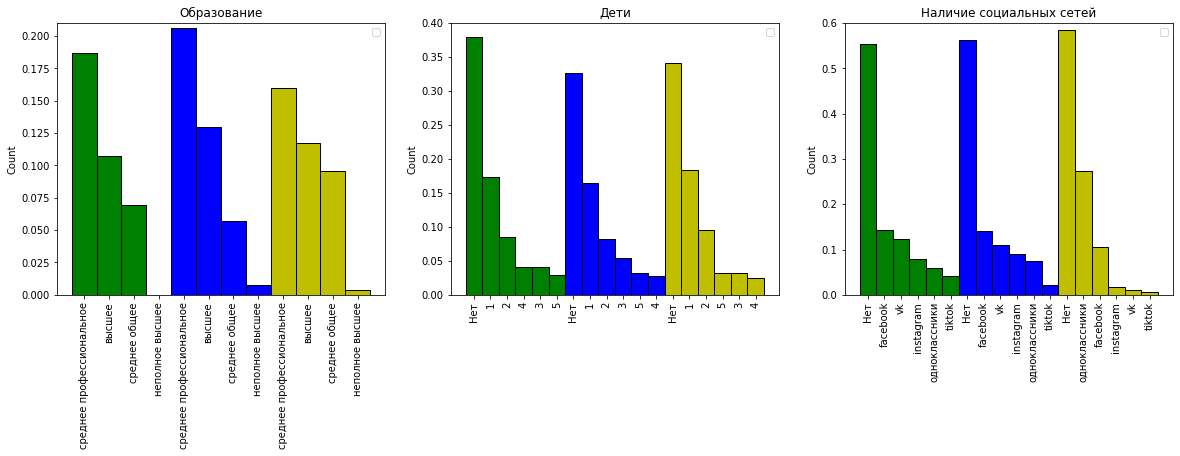

In [357]:
fig3

### Портрет среднестатистического пассажира из кластера - 0:
Средний возраст 36 лет - самый молодой кластер пассажиров.   
Путешествует преимущественно на дальние расстояния, как следствие имеет самую высокую среднюю стоимость билета.  
Пользуется преимущественно недорогим классом обслуживания (плацкарт, купе).  
По профессии является либо рабочим на производстве (оператор подвижного состава, механик), либо имеет профессию низкой квалифифкации (продавец), реже профессию в экономической сфере (экономист).  
Проживает в городе миллионнике (Мск, Спб, Екб), либо в крупном мегаполисе (Краснодар).  
Семейное положение - либо в браке, либо никогда не состаял в браке.  
Преимущественно имеет среднее профессионльное образование, реже - высшее.  
Детей как правило нет, реже 1-2 или 4.  
В соц.сетях не зарегисрирован, либо зарегистрирован в facebook, реже в vkontakte, instagram, крайне редко в одноклассники и tiktok.

### Портрет среднестатистического пассажира из кластера - 1:
Средний возраст 40 лет - средний по возрасту кластер пассажиров.   
Путешествует преимущественно на коротки расстояния, -> имеет самую низкую стоимость билета.  
Пользуется преимущественно недорогим классом обслуживания (плацкарт, купе), так же крайне редко классом СВ и люкс.    
По профессии является специалистом в сфере науки и техники, либо рабочим на производстве (оператор подвижного состава, механик).    
Проживает в городе миллионнике (Мск, Спб, Екб), либо в крупном мегаполисе (Тюмень).  
Семейное положение - либо в браке, либо никогда не состаял в браке.  
Преимущественно имеет среднее профессионльное образование, реже - высшее.  
Детей как правило нет, реже 1-2 или 3.  
В соц.сетях не зарегисрирован, либо зарегистрирован в facebook, реже в vkontakte, instagram, одноклассники, крайне редко в tiktok.

### Портрет среднестатистического пассажира из кластера - 2:
Средний возраст 67 лет - самый возрастной кластер пассажиров.   
Путешествует преимущественно на средние расстояния, -> имеет среднюю стоимость билета.  
Пользуется преимущественно недорогим классом обслуживания (плацкарт, купе), так же крайне редко классом СВ.    
Как правило имеет низкоквалифицированную профессию, либо пенсионер.      
Проживает в городе миллионнике (Мск, Спб), либо в относительно некрупных городах (Воронеж, Самара).  
Семейное положение - либо в браке, либо вдова, реже разведена.  
Преимущественно имеет среднее профессионльное образование, реже - высшее.  
Детей как правило нет, реже 1-2 или 5.  
В соц.сетях не зарегисрирован, либо зарегистрирован в одноклассниках, реже в facebook, крайне редко - instagram, vkontakte, tiktok.